## Unsupervised ML Python Homework

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sys
import warnings
import os
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

In [2]:
data = pd.read_csv('unsupervised-ml-homework-data.csv')

### Soal 1: PCA

Instruksi:
1. Lakukan PCA pada data yang telah di-import di cell atas.
2. Ketentuan PCA: Ambil sampai threshold explained variancenya 0.8 (80%)
3. Berapa Principal Components yang diambil?
4. Simpan data hasil PCA karena data hasil PCA ini akan digunakan di Soal 2: K-Means

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.737848,-1.646325,-7.810163,11.995504,-2.807248,-0.085124,2.255992,1.746520,-9.256078,1.693435,-19.772970,9.750907,4.551802,-7.251561,5.099425,2.270202,-8.097061,-6.058829,-3.268958,2.623776
1,-6.024396,-0.488319,4.315504,0.650888,-14.594512,-2.801084,10.649474,6.087658,10.845574,5.494591,10.725055,2.933646,-12.785655,-9.768811,-14.827223,-6.423245,8.097094,1.899088,0.376761,-3.531153
2,0.490949,-10.487436,-9.045535,0.129481,3.977727,-7.615191,-12.787071,6.416582,11.013078,-5.251267,-5.692146,0.834205,3.299760,3.082884,-5.425403,6.274120,-11.407726,-5.886591,3.365510,23.723555
3,-13.087377,7.845202,21.154323,7.971816,-13.379182,1.204298,5.592174,-3.450956,6.537270,5.360073,5.689761,3.148839,3.416195,-16.175695,1.531479,5.373013,1.643889,1.227602,3.878080,12.262810
4,-7.171991,13.705993,11.057470,14.073451,-7.947617,-4.637308,6.351615,-6.814010,-2.483272,4.279979,9.275197,-18.018556,-3.428444,-5.252267,-6.693149,-4.172268,6.079671,7.918299,5.047994,4.019611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-3.471686,12.940466,8.508031,19.479180,-3.637595,3.513321,12.118536,0.347570,5.111509,-3.054912,5.697629,7.516148,-10.959986,-8.098598,-5.641822,2.220350,12.026172,5.860314,3.439185,-0.963639
996,-7.518274,6.128470,11.750514,3.632682,-17.542199,-1.025005,10.457185,-5.062221,6.447733,1.171539,-2.275978,8.270251,-15.710402,-12.621179,-15.950729,-9.878082,12.856359,0.787886,3.381137,0.173625
997,8.765803,-10.063699,-2.102178,8.809839,-3.357467,-5.563186,1.583849,-0.648160,7.130244,-5.364986,-12.926855,-2.191091,18.516239,3.508759,-3.534441,8.934743,-15.085670,5.897779,-3.473376,8.841673
998,-0.688375,-2.251089,-16.099880,-5.961233,-2.604041,-12.876690,-23.101496,-4.899372,13.612339,-15.022254,-8.881761,-13.294057,11.791521,5.684052,-12.296774,-10.716805,-4.355119,-9.737902,12.584078,14.301682


In [4]:
data.shape

(1000, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
dtypes: float64(20)
memory usage: 156.4 KB


In [6]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [8]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (900, 19)
y_train shape: (900,)
X_test shape: (100, 19)
y_test shape: (100,)


In [9]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-7.531347,-7.669071,5.706323,17.343498,-11.871645,7.251496,16.997489,-2.501709,15.142009,-4.794547,2.846805,-3.260498,-9.005195,-2.039704,1.729595,-10.249067,14.335537,0.288697,7.727772
1,0.087230,-14.687099,-5.905719,-1.283639,-1.628197,-2.989611,1.597321,6.204532,11.352660,-1.577953,-7.260453,10.485000,-0.057814,6.146366,-4.781530,7.274502,-2.367165,3.627396,6.600688
2,-13.863986,2.587453,-7.513729,-3.392510,-1.777144,-3.609679,-8.624380,3.954032,13.084307,0.133784,-15.902262,4.313056,6.952633,9.776827,-13.245674,-1.902926,-11.597336,1.049458,3.110983
3,-8.414920,-9.920235,-7.553427,-1.089183,-6.397807,-7.859725,-11.150653,10.475672,4.810135,-7.893177,-6.144186,-5.780936,5.197678,5.022893,-5.303463,5.898344,-4.173131,4.327344,-0.212874
4,2.984504,-5.336355,-1.369807,4.171383,0.560388,3.035532,-9.355182,6.865048,-0.724423,-3.488739,-15.256505,-4.695989,0.202834,4.755993,-11.992630,-8.793574,-7.924157,2.216383,2.387138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,3.981862,15.488612,-5.539034,-2.563145,-2.102357,4.915190,9.252606,2.302395,5.356176,-2.549878,4.732338,-3.651996,0.167379,-13.751682,-3.320184,-5.196095,23.237801,-0.211668,-2.643283
896,-1.075167,-11.615591,2.068138,-22.106421,-7.467709,-11.021269,-7.833785,-1.243255,1.615852,-6.888498,-19.559992,-6.655283,0.081676,6.432338,2.898943,-6.026608,-15.271368,3.636868,9.081595
897,-9.481631,9.856765,-4.135927,9.830398,-3.576782,1.337551,-2.004511,5.680553,-8.757911,-10.466387,-4.412906,2.533674,3.994754,-10.721704,2.348668,-7.355768,-4.785743,-7.446459,4.014459
898,1.803333,5.197657,-4.314042,0.859165,-12.964852,2.605769,-2.370955,5.336655,-5.537268,-0.563639,-3.228210,13.713282,-6.048801,0.258049,5.121085,-0.965711,0.806786,-15.911254,7.261993


In [10]:
pd.DataFrame(y_train)

,0
0,-2.443198
1,-0.468590
2,3.508013
3,7.241451
4,10.188359
...,...
895,-5.078915
896,5.039673
897,2.508033
898,5.248491


In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [12]:
from sklearn.decomposition import PCA
pca_80 = PCA(0.80)

In [13]:
start_time = time.time()
pca_80.fit(X_train_scaled)
X_train_pca_80 = pca_80.transform(X_train_scaled)
X_test_pca_80 = pca_80.transform(X_test_scaled)
finish_time = time.time()

In [14]:
print('PCA Fit and Transform finished in', finish_time - start_time, 'seconds.')
print('Hanya tersisa:', pca_80.n_components_, 'feature columns setelah dlakukan PCA.')
print('PCA kali ini berhasil mereduksi dataset sebanyak', (1-(pca_80.n_components_/19))*100, 'persen')

PCA Fit and Transform finished in 0.0031805038452148438 seconds.
Hanya tersisa: 11 feature columns setelah dlakukan PCA.
PCA kali ini berhasil mereduksi dataset sebanyak 42.10526315789473 persen


In [15]:
pca_80.n_components_

11

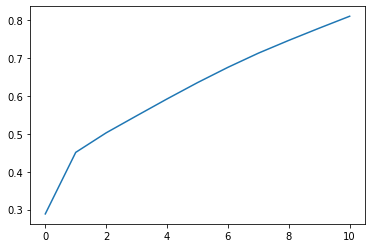

In [16]:
plt.plot(np.cumsum(pca_80.explained_variance_ratio_))
plt.show()

##### Jawab: Hasil PCA adalah mengambil **11** Principal Components

### Soal 2: K Means

Instruksi:
1. Dari data yang sudah di-PCA-kan (jadi datanya sudah baru ya, bukan data original lagi, ingat, data yang sudah di-PCA-kan), kita akan menentukan k = ?? yang paling ideal untuk clustering.
2. Lakukan Elbow dan Silhouette method
3. Visualisasikan hasil Elbow dan Silhouette method
4. Berapa nilai k yang terbaik? 

In [17]:
# Elbow Method
score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(X_train_pca_80)
    score.append(kmeans.inertia_)

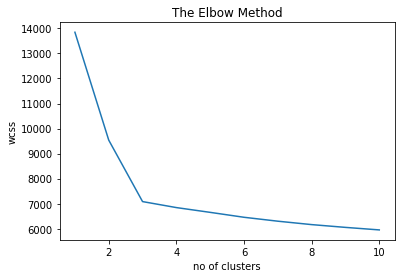

In [18]:
# plotting the score

plt.plot(range(1, 11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

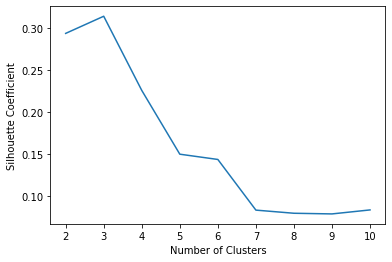

In [19]:
### Silhouette Score
silhouette_coefficients = []
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_pca_80)
    score = silhouette_score(X_train_pca_80, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

'Elbow' terjadi di k = 2 dan k = 3, sedangkan nilai Silhouette tertinggi ada di k = 3. 

##### Jawab: Nilai k yang terbaik berdasarkan Elbow dan Silhouette method adalah...k = 3